#**Application of Deep Learning in Autonomous Driving System**

##Autonomous Driving System

With the increasing penetration of ADAS in new cars, such as, ACC (Adaptive Cruise Control), LDW (Lane Departure Warning), and AVP (Automated Valet Parking), these kinds of ADAS functions are being more and more popular. Meanwhile, self-driving cars are being tested on public roads by some giant technology and carmaker companies, such as Waymo, Baidu and GM. Self-driving Robotaxis are taking off in many cities in China and US.  

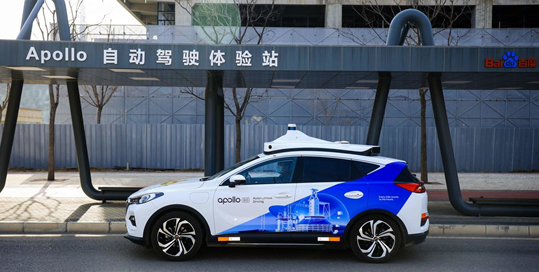

**Baidu Apollo Robotaxi in Beijing**  
*Picture Source: Baidu*

The most critical factor of the au'tonomous driving system is Data. The data of the real road testings. Absolutely, the data come from all kinds of sensors. We need multiple sensors, such as cameras, radars, Lidars, and HD maps, to detect the environment around the vehicles, even the information from the transport infrastructure, for example, the V2X technology makes connected cars to communicate with other vehicles and even anything else.

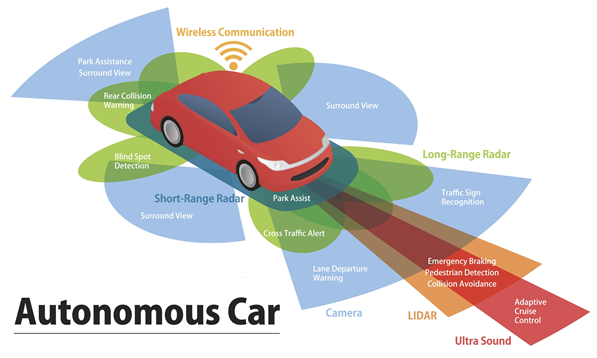

*Picture Source: Endeavor Business Media.*

As we know, the au'tonomous driving system is composed of sense, perceive, decide, and actuate, these four layers. And most AI technology applied in perception and decide layers.

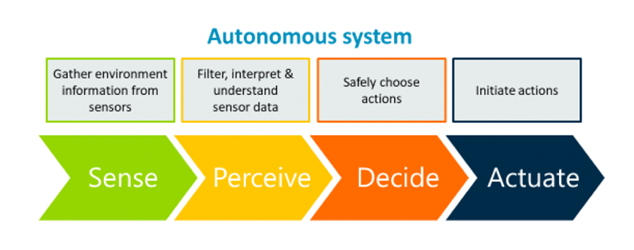

*Picture Source: Arm Limited*

In my point of view, **sensor fusion** is one of the most key technical points to the success of au'tonomous driving system.  Because each sensor has its own advantages and disadvantages, for example, from the vision system, it is easy to recognize the type of target from the colorful image, and from the radar system, we can get the information about object's speed and position, and from the Lidar system, we can retrieve more accurate distance information. So, after sensor fusion, We can combine all the advantages to get better recognition results. 

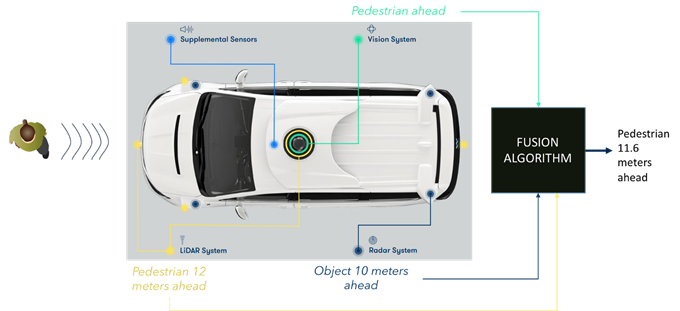

**Sensor Fusion in AD Perception**  
*Picture Source: medium.com*

##Object Detection Algorithm

Recent years, Object Detection by vision system, such as single camera or Stereo /ˈsterioʊ/ Camera is still the most widely used Deep Learning technology, and with the most performance improvement.
Typically, there are four components of an object detection framework: Region proposal, Feature extraction and network predictions, Non-maximum suppression (NMS), and Evaluation metrics



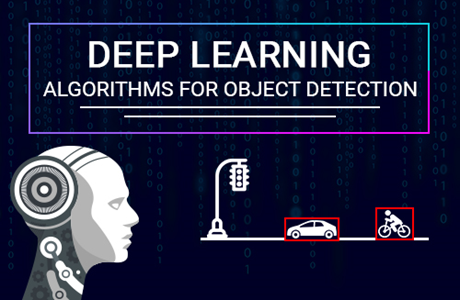

*Picture Source: Analytics Vidhya*

**Two-Stage:**

The detection of R-CNN family models has two stages: First, the model proposes a set of  ROI, regions of interest by Selective Search or Regional Proposal Network (RPN) according to the potential bounding box candidates. Then only based on the candidate region, we process the classifier.

**One-Stage:**

But this kind of Network is too slow at inference time. So One-stage detectors, such as the SSD and Yolo, were proposed later. The image is passed once through the network to predict the confidence score and the object class. We can see here, the single shot detectors are much faster than two-stage detectors.

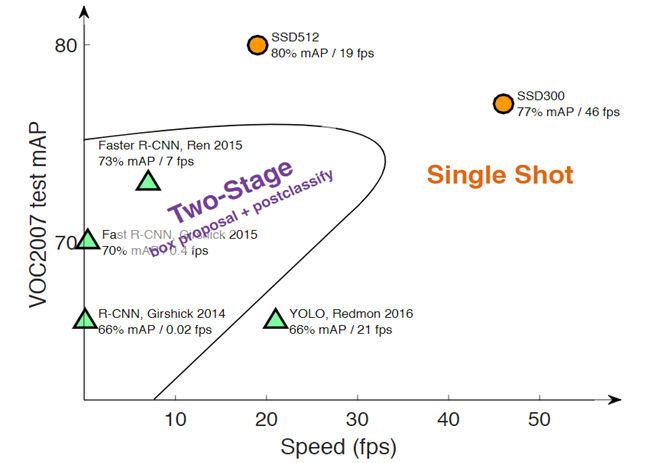

*Picture Source: SSD: Single Shot MultiBox Detector (slides)*

##SSD: Single Shot MultiBox Detector

* Good balance between speed and accuracy
* Prior Box (Anchor Box)
* Feature maps of various scales
* Hard Negative Mining

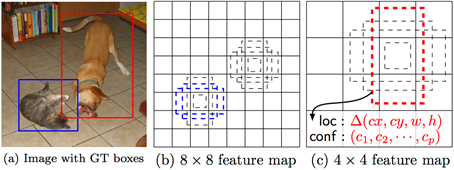

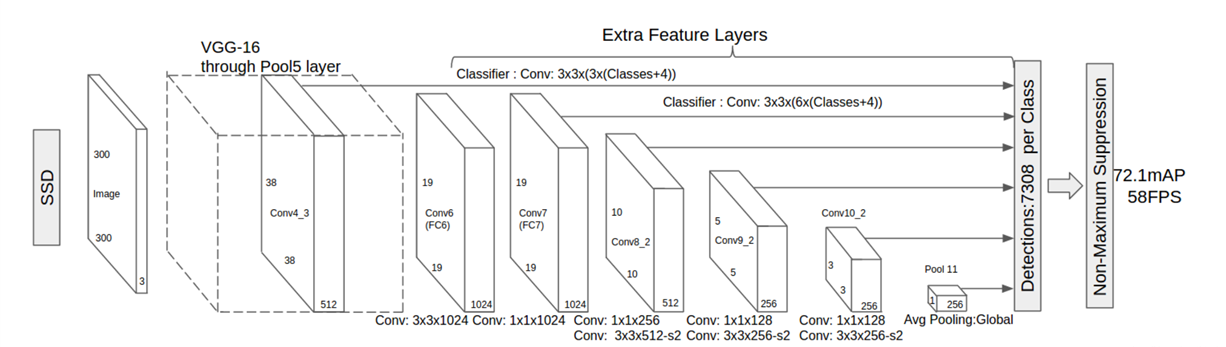

*Source: SSD: Single Shot MultiBox Detector*

##Implementation on Embedded Platform

This is the implementation of the SSD model based on embedded system, for example the automotive grade platform, Renesas RCar V3H (eCube). 
I applied the pre-trained SSD caffe model, via the frontend CNN tools provided by Renesas, to convert the caffe model to binary files which can be used by Hardware accelerators. 

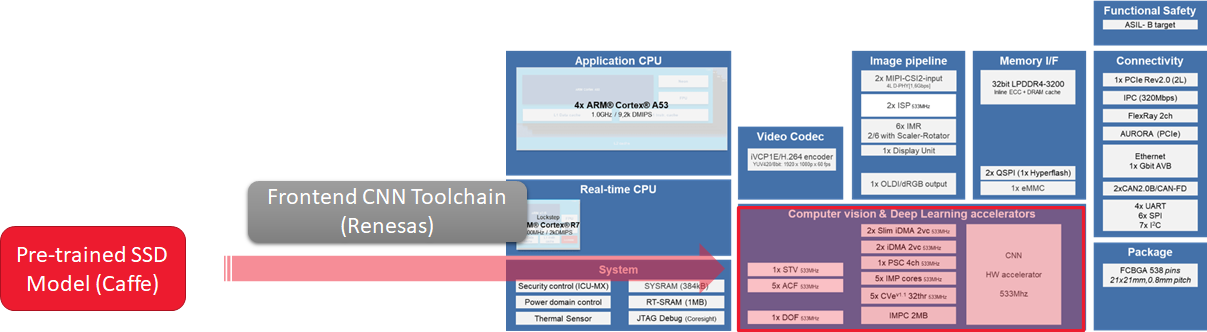

*Picture Source: Renesas*

We are testing this platform with the real-time images directly from the camera. And we can get the output with the bounding boxes. 

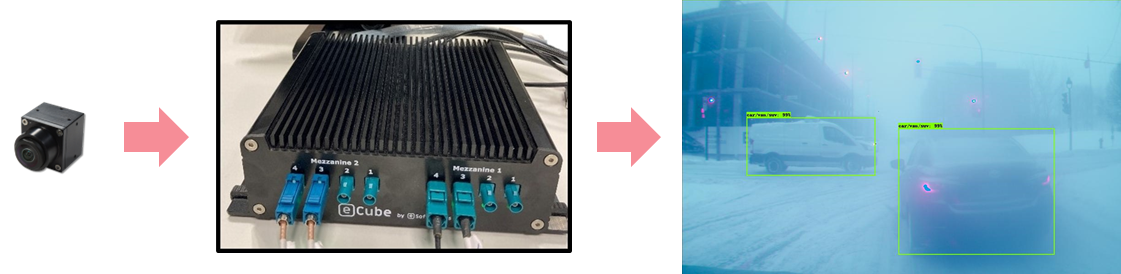

##Project Demo

My implementation based on pre-trained SSD model. I am Testing on the dataset of VOC2007. For this project I just Detect the objects with the classes of **Bicycle, Bus, Car, Motorbike, Person, Train** that related to the transportation on the real road.

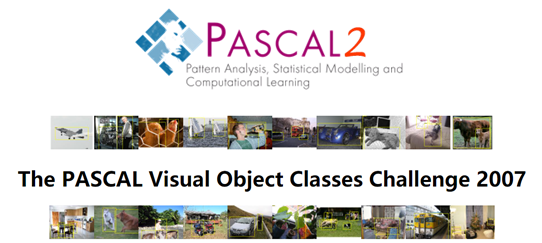

Here are the demo code:

In [ ]:
!pip3 install keras==1.2.2

     |████████████████████████████████| 175 kB 8.9 MB/s 
     |████████████████████████████████| 2.8 MB 43.1 MB/s 
  Created wheel for keras: filename=Keras-1.2.2-py3-none-any.whl size=209601 sha256=2beb1754de33ae7b8452579622c830eb5316bac10f44f53e52c6486de45b2d9a
  Stored in directory: /root/.cache/pip/wheels/d1/32/23/2a1db3765ec19c91503843380a4f92b6530598949c661c5fa2
  Created wheel for theano: filename=Theano-1.0.5-py3-none-any.whl size=2668111 sha256=a0a8af436c232ea49b4714d26ac3efff7afc99d60caf28df65e810245ca773cf
  Stored in directory: /root/.cache/pip/wheels/26/68/6f/745330367ce7822fe0cd863712858151f5723a0a5e322cc144
Successfully built keras theano
  Attempting uninstall: keras
    Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [ ]:
!pip3 install tensorflow==1.13.1

     |████████████████████████████████| 92.6 MB 23 kB/s 
     |████████████████████████████████| 50 kB 8.6 MB/s 
     |████████████████████████████████| 3.2 MB 57.4 MB/s 
     |████████████████████████████████| 367 kB 74.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.5.0
    Uninstalling tensorflow-2.5.0:
      Successfully uninstalled tensorflow-2.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.5 requires tensorflow>=2.0.0, but you 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!cp drive/MyDrive/229_Final/ssd_utils.py .
!cp drive/MyDrive/229_Final/ssd_layers.py .
!cp drive/MyDrive/229_Final/ssd_training.py .

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import keras
import glob
import numpy as np
import matplotlib.pyplot as plt

from keras.applications.imagenet_utils import preprocess_input
from keras.models import Model
from keras.preprocessing import image

from ssd_utils import BBoxUtility

%matplotlib inline

Using TensorFlow backend.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

In [ ]:
#import keras.backend as K
from keras import backend as K
from keras.layers import Activation
from keras.layers import AtrousConvolution2D
from keras.layers import Convolution2D
from keras.layers import GlobalAveragePooling2D
from keras.layers import MaxPooling2D
from keras.layers import ZeroPadding2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.layers import merge
from keras.layers import Reshape
from keras.models import Model

from ssd_layers import Normalize
from ssd_layers import PriorBox
from ssd_training import MultiboxLoss

In [ ]:
# Here are some object classes defined in VOC2007
classes = ['Aeroplane', 'Bicycle', 'Bird', 'Boat', 'Bottle',
      'Bus', 'Car', 'Cat', 'Chair', 'Cow', 'Diningtable',
      'Dog', 'Horse','Motorbike', 'Person', 'Pottedplant',
      'Sheep', 'Sofa', 'Train', 'Tvmonitor']

Define the SSD Model (300*300) accoring to the reference paper: https://arxiv.org/abs/1512.02325

In [ ]:
def SSD300(input_shape, num_classes=21):
    """SSD300 architecture.

    # Arguments
        input_shape: Shape of the input image,
            expected to be either (300, 300, 3).
        num_classes: Number of classes including background.

    # References
        https://arxiv.org/abs/1512.02325
    """
    net = {}

    # Block 1
    input_tensor = Input(shape=input_shape)
    img_size = (input_shape[1], input_shape[0])
    net['input'] = input_tensor
    net['conv1_1'] = Convolution2D(64, 3, 3,
                    activation='relu',
                    border_mode='same',
                    name='conv1_1')(net['input'])
    net['conv1_2'] = Convolution2D(64, 3, 3,
                    activation='relu',
                    border_mode='same',
                    name='conv1_2')(net['conv1_1'])
    net['pool1'] = MaxPooling2D((2, 2), strides=(2, 2), border_mode='same',
                    name='pool1')(net['conv1_2'])
    
    # Block 2
    net['conv2_1'] = Convolution2D(128, 3, 3,
                    activation='relu',
                    border_mode='same',
                    name='conv2_1')(net['pool1'])
    net['conv2_2'] = Convolution2D(128, 3, 3,
                    activation='relu',
                    border_mode='same',
                    name='conv2_2')(net['conv2_1'])
    net['pool2'] = MaxPooling2D((2, 2), strides=(2, 2), border_mode='same',
                    name='pool2')(net['conv2_2'])
    
    # Block 3
    net['conv3_1'] = Convolution2D(256, 3, 3,
                    activation='relu',
                    border_mode='same',
                    name='conv3_1')(net['pool2'])
    net['conv3_2'] = Convolution2D(256, 3, 3,
                    activation='relu',
                    border_mode='same',
                    name='conv3_2')(net['conv3_1'])
    net['conv3_3'] = Convolution2D(256, 3, 3,
                    activation='relu',
                    border_mode='same',
                    name='conv3_3')(net['conv3_2'])
    net['pool3'] = MaxPooling2D((2, 2), strides=(2, 2), border_mode='same',
                    name='pool3')(net['conv3_3'])
    
    # Block 4
    net['conv4_1'] = Convolution2D(512, 3, 3,
                    activation='relu',
                    border_mode='same',
                    name='conv4_1')(net['pool3'])
    net['conv4_2'] = Convolution2D(512, 3, 3,
                    activation='relu',
                    border_mode='same',
                    name='conv4_2')(net['conv4_1'])
    net['conv4_3'] = Convolution2D(512, 3, 3,
                    activation='relu',
                    border_mode='same',
                    name='conv4_3')(net['conv4_2'])
    net['pool4'] = MaxPooling2D((2, 2), strides=(2, 2), border_mode='same',
                    name='pool4')(net['conv4_3'])
    
    # Block 5
    net['conv5_1'] = Convolution2D(512, 3, 3,
                    activation='relu',
                    border_mode='same',
                    name='conv5_1')(net['pool4'])
    net['conv5_2'] = Convolution2D(512, 3, 3,
                    activation='relu',
                    border_mode='same',
                    name='conv5_2')(net['conv5_1'])
    net['conv5_3'] = Convolution2D(512, 3, 3,
                    activation='relu',
                    border_mode='same',
                    name='conv5_3')(net['conv5_2'])
    net['pool5'] = MaxPooling2D((3, 3), strides=(1, 1), border_mode='same',
                    name='pool5')(net['conv5_3'])
    
    # FC6
    net['fc6'] = AtrousConvolution2D(1024, 3, 3, atrous_rate=(6, 6),
                    activation='relu', border_mode='same',
                    name='fc6')(net['pool5'])

    # FC7
    net['fc7'] = Convolution2D(1024, 1, 1, activation='relu',
                    border_mode='same', name='fc7')(net['fc6'])

    # Block 6
    net['conv6_1'] = Convolution2D(256, 1, 1, activation='relu',
                    border_mode='same',
                    name='conv6_1')(net['fc7'])
    net['conv6_2'] = Convolution2D(512, 3, 3, subsample=(2, 2),
                    activation='relu', border_mode='same',
                    name='conv6_2')(net['conv6_1'])
    
    # Block 7
    net['conv7_1'] = Convolution2D(128, 1, 1, activation='relu',
                    border_mode='same',
                    name='conv7_1')(net['conv6_2'])
    net['conv7_2'] = ZeroPadding2D()(net['conv7_1'])
    net['conv7_2'] = Convolution2D(256, 3, 3, subsample=(2, 2),
                    activation='relu', border_mode='valid',
                    name='conv7_2')(net['conv7_2'])
    
    # Block 8
    net['conv8_1'] = Convolution2D(128, 1, 1, activation='relu',
                    border_mode='same',
                    name='conv8_1')(net['conv7_2'])
    net['conv8_2'] = Convolution2D(256, 3, 3, subsample=(2, 2),
                    activation='relu', border_mode='same',
                    name='conv8_2')(net['conv8_1'])
    
    # Last Pool
    net['pool6'] = GlobalAveragePooling2D(name='pool6')(net['conv8_2'])
    
    # Prediction from conv4_3
    net['conv4_3_norm'] = Normalize(20, name='conv4_3_norm')(net['conv4_3'])
    num_priors = 3
    x = Convolution2D(num_priors * 4, 3, 3, border_mode='same',
              name='conv4_3_norm_mbox_loc')(net['conv4_3_norm'])
    net['conv4_3_norm_mbox_loc'] = x
    flatten = Flatten(name='conv4_3_norm_mbox_loc_flat')
    net['conv4_3_norm_mbox_loc_flat'] = flatten(net['conv4_3_norm_mbox_loc'])
    name = 'conv4_3_norm_mbox_conf'
    if num_classes != 21:
        name += '_{}'.format(num_classes)
    x = Convolution2D(num_priors * num_classes, 3, 3, border_mode='same',
              name=name)(net['conv4_3_norm'])
    net['conv4_3_norm_mbox_conf'] = x
    flatten = Flatten(name='conv4_3_norm_mbox_conf_flat')
    net['conv4_3_norm_mbox_conf_flat'] = flatten(net['conv4_3_norm_mbox_conf'])
    priorbox = PriorBox(img_size, 30.0, aspect_ratios=[2],
                variances=[0.1, 0.1, 0.2, 0.2],
                name='conv4_3_norm_mbox_priorbox')
    net['conv4_3_norm_mbox_priorbox'] = priorbox(net['conv4_3_norm'])
    
    # Prediction from fc7
    num_priors = 6
    net['fc7_mbox_loc'] = Convolution2D(num_priors * 4, 3, 3,
                        border_mode='same',
                        name='fc7_mbox_loc')(net['fc7'])
    flatten = Flatten(name='fc7_mbox_loc_flat')
    net['fc7_mbox_loc_flat'] = flatten(net['fc7_mbox_loc'])
    name = 'fc7_mbox_conf'
    if num_classes != 21:
        name += '_{}'.format(num_classes)
    net['fc7_mbox_conf'] = Convolution2D(num_priors * num_classes, 3, 3,
                        border_mode='same',
                        name=name)(net['fc7'])
    flatten = Flatten(name='fc7_mbox_conf_flat')
    net['fc7_mbox_conf_flat'] = flatten(net['fc7_mbox_conf'])
    priorbox = PriorBox(img_size, 60.0, max_size=114.0, aspect_ratios=[2, 3],
                        variances=[0.1, 0.1, 0.2, 0.2],
                        name='fc7_mbox_priorbox')
    net['fc7_mbox_priorbox'] = priorbox(net['fc7'])
    
    # Prediction from conv6_2
    num_priors = 6
    x = Convolution2D(num_priors * 4, 3, 3, border_mode='same',
              name='conv6_2_mbox_loc')(net['conv6_2'])
    net['conv6_2_mbox_loc'] = x
    flatten = Flatten(name='conv6_2_mbox_loc_flat')
    net['conv6_2_mbox_loc_flat'] = flatten(net['conv6_2_mbox_loc'])
    name = 'conv6_2_mbox_conf'
    if num_classes != 21:
        name += '_{}'.format(num_classes)
    x = Convolution2D(num_priors * num_classes, 3, 3, border_mode='same',
              name=name)(net['conv6_2'])
    net['conv6_2_mbox_conf'] = x
    flatten = Flatten(name='conv6_2_mbox_conf_flat')
    net['conv6_2_mbox_conf_flat'] = flatten(net['conv6_2_mbox_conf'])
    priorbox = PriorBox(img_size, 114.0, max_size=168.0, aspect_ratios=[2, 3],
                variances=[0.1, 0.1, 0.2, 0.2],
                name='conv6_2_mbox_priorbox')
    net['conv6_2_mbox_priorbox'] = priorbox(net['conv6_2'])
    
    # Prediction from conv7_2
    num_priors = 6
    x = Convolution2D(num_priors * 4, 3, 3, border_mode='same',
              name='conv7_2_mbox_loc')(net['conv7_2'])
    net['conv7_2_mbox_loc'] = x
    flatten = Flatten(name='conv7_2_mbox_loc_flat')
    net['conv7_2_mbox_loc_flat'] = flatten(net['conv7_2_mbox_loc'])
    name = 'conv7_2_mbox_conf'
    if num_classes != 21:
        name += '_{}'.format(num_classes)
    x = Convolution2D(num_priors * num_classes, 3, 3, border_mode='same',
              name=name)(net['conv7_2'])
    net['conv7_2_mbox_conf'] = x
    flatten = Flatten(name='conv7_2_mbox_conf_flat')
    net['conv7_2_mbox_conf_flat'] = flatten(net['conv7_2_mbox_conf'])
    priorbox = PriorBox(img_size, 168.0, max_size=222.0, aspect_ratios=[2, 3],
                variances=[0.1, 0.1, 0.2, 0.2],
                name='conv7_2_mbox_priorbox')
    net['conv7_2_mbox_priorbox'] = priorbox(net['conv7_2'])
    
    # Prediction from conv8_2
    num_priors = 6
    x = Convolution2D(num_priors * 4, 3, 3, border_mode='same',
              name='conv8_2_mbox_loc')(net['conv8_2'])
    net['conv8_2_mbox_loc'] = x
    flatten = Flatten(name='conv8_2_mbox_loc_flat')
    net['conv8_2_mbox_loc_flat'] = flatten(net['conv8_2_mbox_loc'])
    name = 'conv8_2_mbox_conf'
    if num_classes != 21:
        name += '_{}'.format(num_classes)
    x = Convolution2D(num_priors * num_classes, 3, 3, border_mode='same',
              name=name)(net['conv8_2'])
    net['conv8_2_mbox_conf'] = x
    flatten = Flatten(name='conv8_2_mbox_conf_flat')
    net['conv8_2_mbox_conf_flat'] = flatten(net['conv8_2_mbox_conf'])
    priorbox = PriorBox(img_size, 222.0, max_size=276.0, aspect_ratios=[2, 3],
                variances=[0.1, 0.1, 0.2, 0.2],
                name='conv8_2_mbox_priorbox')
    net['conv8_2_mbox_priorbox'] = priorbox(net['conv8_2'])
    
    # Prediction from pool6
    num_priors = 6
    x = Dense(num_priors * 4, name='pool6_mbox_loc_flat')(net['pool6'])
    net['pool6_mbox_loc_flat'] = x
    name = 'pool6_mbox_conf_flat'
    if num_classes != 21:
        name += '_{}'.format(num_classes)
    x = Dense(num_priors * num_classes, name=name)(net['pool6'])
    net['pool6_mbox_conf_flat'] = x
    priorbox = PriorBox(img_size, 276.0, max_size=330.0, aspect_ratios=[2, 3],
                variances=[0.1, 0.1, 0.2, 0.2],
                name='pool6_mbox_priorbox')
    if K.image_dim_ordering() == 'tf':
        target_shape = (1, 1, 256)
    else:
        target_shape = (256, 1, 1)
    net['pool6_reshaped'] = Reshape(target_shape,
                      name='pool6_reshaped')(net['pool6'])
    net['pool6_mbox_priorbox'] = priorbox(net['pool6_reshaped'])
    
    # Gather all predictions
    net['mbox_loc'] = merge([net['conv4_3_norm_mbox_loc_flat'],
                  net['fc7_mbox_loc_flat'],
                  net['conv6_2_mbox_loc_flat'],
                  net['conv7_2_mbox_loc_flat'],
                  net['conv8_2_mbox_loc_flat'],
                  net['pool6_mbox_loc_flat']],
                  mode='concat', concat_axis=1, name='mbox_loc')
    net['mbox_conf'] = merge([net['conv4_3_norm_mbox_conf_flat'],
                  net['fc7_mbox_conf_flat'],
                  net['conv6_2_mbox_conf_flat'],
                  net['conv7_2_mbox_conf_flat'],
                  net['conv8_2_mbox_conf_flat'],
                  net['pool6_mbox_conf_flat']],
                  mode='concat', concat_axis=1, name='mbox_conf')
    net['mbox_priorbox'] = merge([net['conv4_3_norm_mbox_priorbox'],
                  net['fc7_mbox_priorbox'],
                  net['conv6_2_mbox_priorbox'],
                  net['conv7_2_mbox_priorbox'],
                  net['conv8_2_mbox_priorbox'],
                  net['pool6_mbox_priorbox']],
                  mode='concat', concat_axis=1,
                  name='mbox_priorbox')
    if hasattr(net['mbox_loc'], '_keras_shape'):
        num_boxes = net['mbox_loc']._keras_shape[-1] // 4
    elif hasattr(net['mbox_loc'], 'int_shape'):
        num_boxes = K.int_shape(net['mbox_loc'])[-1] // 4
    net['mbox_loc'] = Reshape((num_boxes, 4),
                  name='mbox_loc_final')(net['mbox_loc'])
    net['mbox_conf'] = Reshape((num_boxes, num_classes),
                  name='mbox_conf_logits')(net['mbox_conf'])
    net['mbox_conf'] = Activation('softmax',
                    name='mbox_conf_final')(net['mbox_conf'])
    net['predictions'] = merge([net['mbox_loc'],
                    net['mbox_conf'],
                    net['mbox_priorbox']],
                    mode='concat', concat_axis=2,
                    name='predictions')
    model = Model(net['input'], net['predictions'])
    return model

In [ ]:
model = SSD300((300, 300, 3))
model.load_weights('drive/MyDrive/229_Final/weights_SSD300.hdf5')
bbox_util = BBoxUtility(len(classes)+1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
dim is deprecated, use axis instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


We just detect these classes, related to the road transportation:  
Bicycle, Bus, Car, Motorbike, Person, Train

In [ ]:
def decode_output(out, thresh=0.6):
    out_label  = out[0][:,0]
    conf_score = out[0][:,1]
    x1         = out[0][:,2]
    y1         = out[0][:,3]
    x2         = out[0][:,4]
    y2         = out[0][:,5]
    
    indices = []
    for i in range(len(conf_score)):
        if conf_score[i] >= thresh and (out_label[i] == 2   # Bicycle
                          or out_label[i] == 6  # Bus            
                          or out_label[i] == 7  # Car
                          or out_label[i] == 14 # Motorbike
                          or out_label[i] == 15 # Person
                          or out_label[i] == 19 # Train
                          ):
            indices.append(i)
    
    return conf_score[indices], out_label[indices].tolist(), x1[indices], y1[indices], x2[indices], y2[indices]

def process_frame(img):
    img_pr = cv2.resize(img, (300, 300), interpolation = cv2.INTER_AREA)
    inputs = preprocess_input(np.array([image.img_to_array(img_pr).copy()]))
    
    preds = model.predict(inputs, batch_size=1, verbose=0)
    out = bbox_util.detection_out(preds)
    
    conf, labels, x1, y1, x2, y2 = decode_output(out, 0.6)

    for i in range(len(conf)):
        xmin = int(round(x1[i] * img.shape[1]))
        ymin = int(round(y1[i] * img.shape[0]))
        xmax = int(round(x2[i] * img.shape[1]))
        ymax = int(round(y2[i] * img.shape[0]))
        score=conf[i]
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
        cv2.putText(img, classes[int(labels[i])-1]+': '+str(round(score*100, 2))+'%', (xmin,ymin-6), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2, cv2.LINE_AA)
    
    return img

Here are some images from VOC2007 test set (in the folder: /test_images), and output images are located /out_images

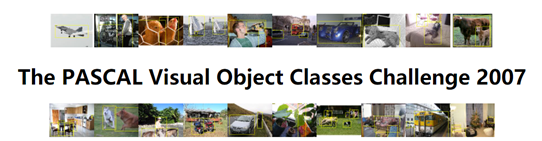

In [ ]:
files = glob.glob("drive/MyDrive/229_Final/test_images/*.jpg")

path_len = len("drive/MyDrive/229_Final/test_images/")

plt.figure(figsize=(200,200))

i = 1

for f in files:
    img = cv2.imread(f)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    out_img = process_frame(img)
    
    cv2.imwrite("drive/MyDrive/229_Final/out_images/"+f[path_len:-4]+'_out.jpg', cv2.cvtColor(out_img, cv2.COLOR_RGB2BGR))
    
    plt.subplot(20, 1, i)
    plt.imshow(out_img)
    plt.axis('off')
    
    i += 1
    
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Here are the detections from the road test video. 

In [ ]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

vids = glob.glob("drive/MyDrive/229_Final/videos/*.mp4")
for i in range(len(vids)):
    # do not process already processed videos.
    if (vids[i][-5] == 'd'):
        continue
    out_name = vids[i][:-4] + '_processed.mp4'
    clip = VideoFileClip(vids[i])
    white_clip = clip.fl_image(process_frame)
    %time white_clip.write_videofile(out_name, audio=False)

[MoviePy] >>>> Building video drive/MyDrive/229_Final/videos/test_video_processed.mp4
[MoviePy] Writing video drive/MyDrive/229_Final/videos/test_video_processed.mp4


 97%|█████████▋| 38/39 [01:07<00:01,  1.76s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: drive/MyDrive/229_Final/videos/test_video_processed.mp4 

CPU times: user 2min 9s, sys: 635 ms, total: 2min 9s
Wall time: 1min 9s
[MoviePy] >>>> Building video drive/MyDrive/229_Final/videos/project_video_processed.mp4
[MoviePy] Writing video drive/MyDrive/229_Final/videos/project_video_processed.mp4


100%|█████████▉| 1260/1261 [37:10<00:01,  1.77s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: drive/MyDrive/229_Final/videos/project_video_processed.mp4 

CPU times: user 1h 9min 33s, sys: 19.3 s, total: 1h 9min 53s
Wall time: 37min 13s


## Conclusion and Future Work

The SSD algorithem is applicatible for real-time image processing, especially on embedded platform, such as Resesas V3 platforms. 

  

Next Step:  
* I tried to train the SSD model on a PC with GPU, but it took more than one day. If enough time, I will try some more time on training with different hyper-parameters, and compare the performance of the results
* Need to adjust the architecture of the network to fix the issue of not recognizing some small items